<a href="https://colab.research.google.com/github/HWatanuki/MatematicaAplicada/blob/main/Dilata%C3%A7%C3%A3o_e_Rota%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Vamos fazer um grid de pontos para referência

In [ ]:
x_interv = np.linspace(-10,10,20)
y_interv = np.linspace(-10,10,20)
x_orig, y_orig = np.meshgrid(x_interv, y_interv)

(-11.0, 11.0, -11.0, 11.0)

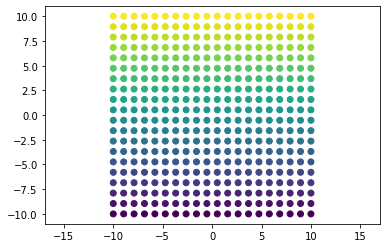

In [ ]:
plt.scatter(x_orig,y_orig, c=y_orig)
plt.axis('equal') 

Dilatando o grid na direção de X

*$A2 = \left[ \begin {array}{cc} 2 & 0 \\ 0 & 1  \end{array}\right] $*

(-22.0, 22.0, -11.0, 11.0)

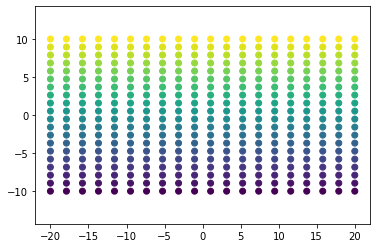

In [ ]:
#esticando na direção de x
A2 = np.zeros((2,2))
#dilatação de x
A2[0,0] = 2
#dilatação em y (não dilata)
A2[1,1] = 1


#     |  2  0  |
#     |  0  1  |


X_esticado = A2[0,0] * x_orig + A2[0,1] * y_orig
Y_esticado = A2[1,0] * x_orig + A2[1,1] * y_orig

plt.scatter(X_esticado,Y_esticado, c=y_orig)
plt.axis('equal')

Rodando o grid de 45°

$A = \left[ \begin {array}{cc} cos\ \theta & -sen\ \theta \\ sen\ \theta & cos\ \theta  \end{array}\right] \\\  \theta = \frac{\pi}{4}$

(-15.556349186104047,
 15.556349186104047,
 -15.556349186104047,
 15.556349186104047)

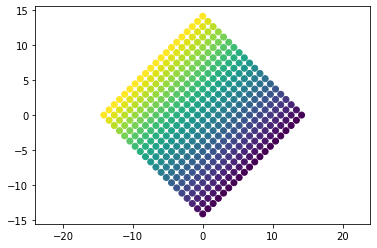

In [ ]:
A = np.zeros((2,2))
# pi/4 = 45°
teta = np.pi / 4; 
A[0,0] = np.cos(teta)
A[0,1] = - np.sin(teta)
A[1,0] = np.sin(teta)
A[1,1] = np.cos(teta)

X_rodado = A[0,0] * x_orig + A[0,1] * y_orig
Y_rodado = A[1,0] * x_orig + A[1,1] * y_orig

plt.scatter(X_rodado,Y_rodado, c=y_orig)
plt.axis('equal')

Cisalhando o grid 

*$T = \left[ \begin {array}{cc} 1.3 & -2.4 \\ 0.1 & 2 \end{array}\right] $*

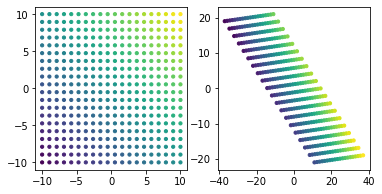

In [ ]:
T = np.array([
    [1.3, -2.4],
    [0.1, 2]
])

X_cisalhado = T[0,0] * x_orig + T[0,1] * y_orig
Y_cisalhado = T[1,0] * x_orig + T[1,1] * y_orig

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(x_orig,y_orig, s=10, c=x_orig+y_orig)
axes[1].scatter(X_cisalhado, Y_cisalhado, s=10, c=X_cisalhado+Y_cisalhado)


Usando a matriz inversa para voltar ao grid original após o cisalhamento

Text(0.5, 1.0, 'restaurado')

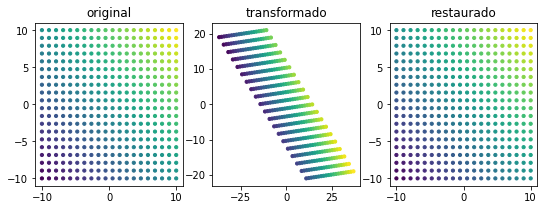

In [ ]:
T = np.array([
    [1.3, -2.4],
    [0.1, 2]
])

T_inv = np.linalg.inv(T)

X_restaurado = T_inv[0,0] * X_cisalhado + T_inv[0,1] * Y_cisalhado
Y_restaurado = T_inv[1,0] * X_cisalhado + T_inv[1,1] * Y_cisalhado

f, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].scatter(x_orig,y_orig, s=10, c=x_orig+y_orig)
axes[0].set_title('original')
axes[1].scatter(X_cisalhado, Y_cisalhado, s=10, c=X_cisalhado+Y_cisalhado)
axes[1].set_title('transformado')
axes[2].scatter(X_restaurado, Y_restaurado, s=10, c=X_restaurado+Y_restaurado)
axes[2].set_title('restaurado')


***$T^{-1}T_{v} = I_{v} = v$***

E se a matriz da transformação não for invertível ?

*$T = \left[ \begin {array}{cc} 3 & 6 \\ 2 & 4 \end{array}\right] $*

O determinante da matriz é 0.0


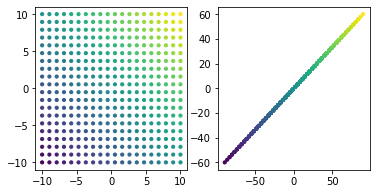

In [ ]:
T = np.array([
    [3, 6],
    [2, 4],
])
# esta matriz não é invertível

det = np.linalg.det(T)
print ("O determinante da matriz é", det)

X_cisalhado = T[0,0] * x_orig + T[0,1] * y_orig
Y_cisalhado = T[1,0] * x_orig + T[1,1] * y_orig

f, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].scatter(x_orig,y_orig, s=10, c=x_orig+y_orig)
axes[1].scatter(X_cisalhado, Y_cisalhado, s=10, c=X_cisalhado+Y_cisalhado)

O espaço inicial é transformado em um reta. Os vários vetores de entrada caem todos em um mesmo local do espaço transformado